#### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#### **Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [5]:
# Downloading and loading the Libraries and Dependencies
# !pip install jupyterthemes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from jupyterthemes import jtplot
jtplot.style(theme = "monokai", context = "notebook", ticks = True, grid = False)
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

**Getting the Data**
* I am using Google Colab for this Project so the act of reading and loading the Data might be different in differnt platforms.

In [17]:
# Loading and reading the Data
PATH = "/content/drive/My Drive/Covid"

# Creating the DataFrame
covid_df = pd.read_csv(os.path.join(PATH, "covid19_Confirmed_dataset.csv"))
happy_df = pd.read_csv(os.path.join(PATH, "worldwide_happiness_report.csv"))
print("DataFrame is ready to go")

DataFrame is ready to go


#### **Working on the Covid DataFrame**

**Inspecting the DataFrame**
* Now, I am going to take the overview of the DataFrame defined above and I will walk through each process so you can gain more insights from it.

In [6]:
# Looking the DataFrame
display(covid_df.head(10));
covid_df.shape

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96,96,99,100,103,103,103,102,103,103,103,103,103,103,104,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


(266, 104)

* As, we can see that the DataFrame contains 266 rows and 104 columns. Therefore, the size of the DataFrame is 27664.
* In the DataFrame, we have Latitude and Longitude of the Province or State of each particular countries which is not important for our analysis. So, it will be more helpful for us to drop the Latitude and Longitude columns from the DataFrame.

In [8]:
# Dropping the Lat and Long columns from the DataFrame
covid_df.drop(["Lat", "Long"], axis=1, inplace=True)

# Inspecting the new dataframe
covid_df.tail(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
256,"Bonaire, Sint Eustatius and Saba",Netherlands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,5,5,5
257,NaN,Malawi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3,3,4,4,5,8,8,8,9,12,13,16,16,16,16,17,17,17,17,18,23,33,33,33,34,36,36,36,37
258,Falkland Islands (Malvinas),United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,5,5,5,5,5,5,11,11,11,11,11,11,11,11,11,12,13,13,13,13,13,13,13
259,Saint Pierre and Miquelon,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,6,6,34,34,35
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
265,NaN,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


* As shown in DataFrame, we can see that many countries in the DataFrame are subdivided on the basis of Province or State. But for our analysis, we need the data to be aggregated on the basis of Country of Region. So, I will aggregate the Data on the basis of particular Country or Region.

In [9]:
# Aggregating the DataFrame on the basis of each particular country or region
covid_agg = covid_df.groupby("Country/Region").sum()

# Inspecting the new DataFrame
covid_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [10]:
# Inspecting the shape of the DataFrame
print(f"The shape of DataFrame is {covid_agg.shape}")

The shape of DataFrame is (187, 100)


Here, From the result obtained above, we can conclude that there is 187 rows and each particular rows correspond each particular country. So, we have 187 countries in the DataFrame.

### **Data Visualization**

* Plotting the Data related to China, Italy, India and Nepal.

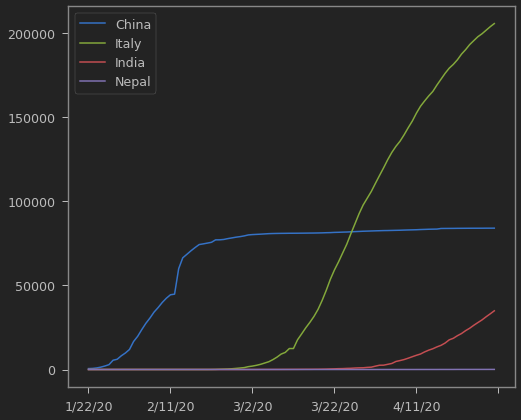

In [12]:
# Plotting the Data of China, Italy, India, Nepal
covid_agg.loc["China"].plot()
covid_agg.loc["Italy"].plot()
covid_agg.loc["India"].plot()
covid_agg.loc["Nepal"].plot()
plt.legend()
plt.show()

From the plot obtained above, the number of confirmed cases with Covid19 has increased rapidly in Italy since March and China had the cases of Covid19 since January and it remains neutral since February.

**Finding the Good Measure**

* Inspecting the increasing rate of Covid19 cases in China, Italy and Spain. As we know that, we have diff() function in Python which helps to calculate the first derivative. Let's implement this function to calculate the maximum number of confirmed cases in each single day.

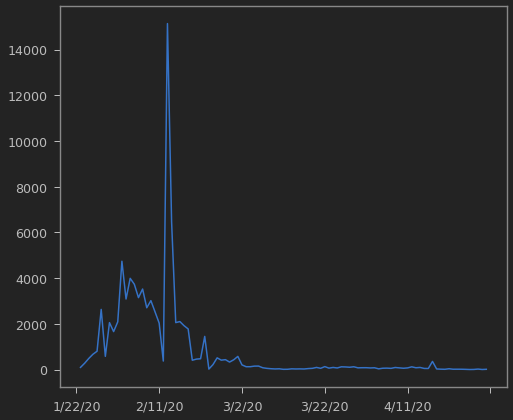

In [13]:
# Plotting the rate of confirmed cases China
covid_agg.loc["China"].diff().plot()

In [14]:
# Finding the maximum increasing rate in China
covid_agg.loc["China"].diff().max()

15136.0

**Maximum Infected rate on each Countries**
* So, I will calculate the maximum infected rate on each countries and add a new column called max_infection in the DataFrame which contains the maximum values of the infected person on each particular day in each particular countries.

In [15]:
# Calculating the maximum infected rate on each Countries
countries = list(covid_agg.index)
max_infection = []
for C in countries:
  max_infection.append(covid_agg.loc[C].diff().max())

# Adding the new column to the DataFrame
covid_agg["max_infection"] = max_infection

# Inspecting the DataFrame
display(covid_agg.head(10));
covid_agg.shape

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,5.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,6.0
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,291.0
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066,134.0
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766,497.0


(187, 101)

**Creating the DataFrame**
* Since, we have just created the new column in the DataFrame which contains the maximum increasing rate, we don't need any other columns except the max_infection.

In [16]:
# Creating the new dataframe which contains just the maximum infection rate columns.
new_covid = pd.DataFrame(covid_agg["max_infection"])

# Inspecting the new DataFrame
display(new_covid.head(10))

,max_infection
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


### **Working on the Happiness DataFrame**

**Inspecting the DataFrame**
* Now, I am going to take the overview of the DataFrame defined above and I will walk through each process so you can gain more insights from it.

In [18]:
# Looking the DataFrame
display(happy_df.head(10));
happy_df.shape

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


(156, 9)

* From the result obtained above, the DataFrame has 156 rows and 9 columns.
* As we can see that there are few columns in the DataFrame which are not very useful for our Analysis so it will be more helpful to drop such columns from our DataFrame.

In [19]:
# Dropping the unnecessary columns from the DataFrame
cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happy_df.drop(cols, axis=1, inplace=True)

# Inspecting the DataFrame
happy_df.head(10)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
5,Switzerland,1.452,1.526,1.052,0.572
6,Sweden,1.387,1.487,1.009,0.574
7,New Zealand,1.303,1.557,1.026,0.585
8,Canada,1.365,1.505,1.039,0.584
9,Austria,1.376,1.475,1.016,0.532


**Processing the DataFrame**
* Changing the Index of the DataFrame because it will be easy for us to join the DataFrame with the Covid DataFrame.

In [20]:
# Changing the index of DataFrame
happy_df.set_index("Country or region", inplace=True)

# Inspecting the DataFrame
happy_df.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


### **Joining the DataFrame**
* Finally, preparing the Final DataFrame by joining the Covid DataFrame and Happiness DataFrame for our Analysis. It will be more helpful to join the DataFrame with inner join because the number of rows for Covid DataFrame is little bigger than Happiness DataFrame.

In [21]:
# Joining the DataFrame
data = new_covid.join(happy_df, how="inner")

# Inspecting the Final DataFrame
display(data.head(10));
data.shape

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


(143, 5)

**Correlation Matrix**
* Finally, let's analyze the Correlation matrix of every columns in the DataFrame. If the correlation between two columns is close to 1, then they are strongly correlated and if the correlation of the two columns is close to 0, then they are not correlated.

In [22]:
# Observing the Correlation
data.corr()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### **Visualization for the Analysis**
* Visualizations is so effective technique to make other people understand about our analysis. So, our analysis will be quite incomplete without the proper Data Visualizations.

**Plotting the Infection Rate vs GDP Capital Income**


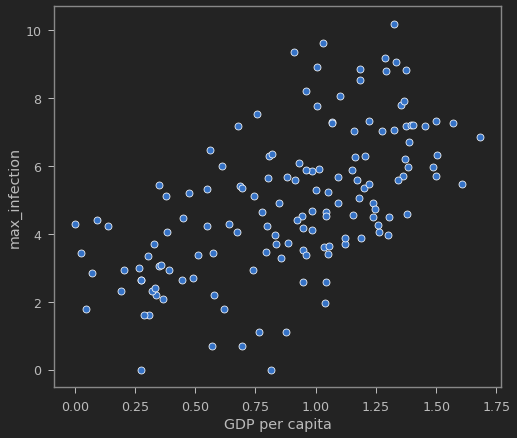

In [23]:
# Plotting Infection rate vs per capital income
x = data["GDP per capita"]
y = data["max_infection"]
sns.scatterplot(x, np.log(y))

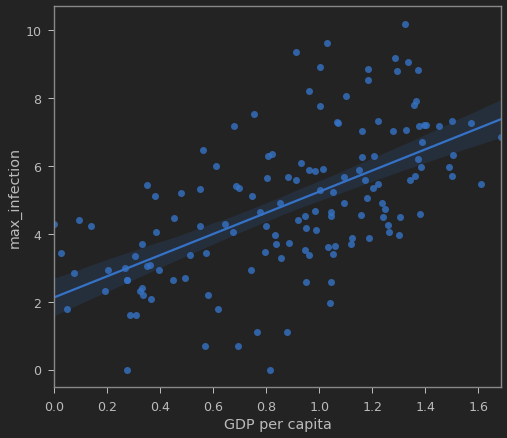

In [24]:
# Plotting Infection rate vs per capital income
x = data["GDP per capita"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

**Plotting Infection Rate vs Social Support**

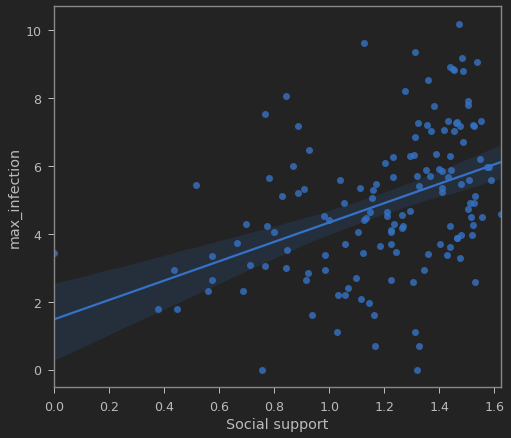

In [32]:
# Plotting Infection rate vs social support
x = data["Social support"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

**Plotting the Infection rate vs Healthy life**


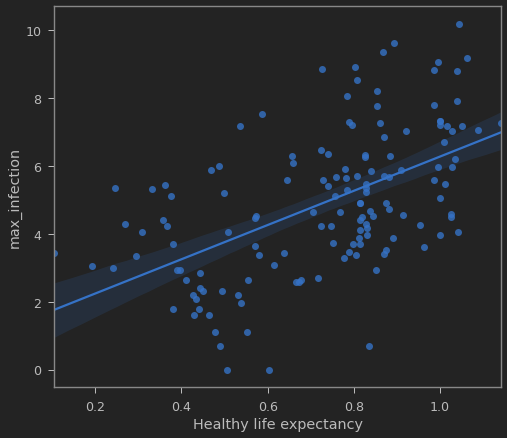

In [33]:
# Plotting Infection rate vs Healthy Life
x = data["Healthy life expectancy"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

**Plotting the Infection rate vs Freedom**

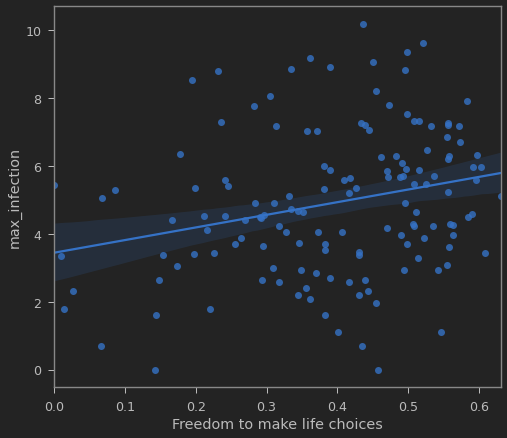

In [35]:
# Plotting Infection rate vs Freedom
x = data["Freedom to make life choices"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

**Conclusion**
* Hence, In this way, The maximum infection rate is affected by various factors such as Per capital Income, Social support, Healthy life, Freedom to make choices.